In [2]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
from lsh import LSH
from IPython.display import Image
from sklearn.neighbors import NearestNeighbors
import time

In [3]:
t=56
base = np.load("./descripteur_img.npy")
base_name = np.load("./descripteur_img_filename.npy")
queries = np.load("./descripteur_queries.npy")
queries_name = np.load("./descripteur_queries_filename.npy")
query=queries[t]
lsh = LSH(nb_projections=10, nb_tables=2, w=1)
lsh.fit(base)
lsh_result = lsh.kneighbors(query, k=1)
lsh_index = lsh_result[1][0]
print(lsh_result, lsh_index)

([0.6043199], array([5331]), 7991) 5331


In [4]:
bf = NearestNeighbors(n_neighbors=1, algorithm='brute')
bf.fit(base)
ground_results = bf.kneighbors(queries, n_neighbors=1)
ground_indices = ground_results[1]
print(ground_indices)

[[2848]
 [5542]
 [2204]
 [7320]
 [ 457]
 [6810]
 [6332]
 [3115]
 [1592]
 [5448]
 [3461]
 [ 115]
 [7628]
 [4872]
 [7230]
 [2850]
 [4133]
 [5088]
 [5577]
 [2653]
 [2292]
 [5080]
 [5419]
 [1759]
 [1751]
 [3907]
 [2767]
 [2756]
 [1282]
 [ 361]
 [4424]
 [1198]
 [3308]
 [4874]
 [6571]
 [7412]
 [5272]
 [3978]
 [7183]
 [ 556]
 [2043]
 [2862]
 [7408]
 [3563]
 [5764]
 [6443]
 [6710]
 [5287]
 [6549]
 [4681]
 [7353]
 [4680]
 [3483]
 [5304]
 [  43]
 [6789]
 [5331]
 [1616]
 [ 192]
 [4146]
 [1805]
 [5277]
 [6813]
 [5041]
 [3623]
 [4963]
 [4475]
 [7737]
 [5079]
 [2590]
 [1181]
 [3945]
 [ 431]
 [7216]
 [2563]
 [1848]
 [1333]
 [ 890]
 [6917]
 [4248]
 [4832]
 [5929]
 [4862]
 [6172]
 [ 456]
 [4277]
 [6469]
 [7890]
 [7349]
 [ 130]
 [ 901]
 [2881]
 [7516]
 [4343]
 [1820]
 [ 712]
 [7804]
 [5350]
 [3986]
 [1666]]


Valeur de W:0.250000
precision: 0.870000
inspected data: 5516.720000
temps des recherches = 2.064049
Valeur de W:0.500000
precision: 1.000000
inspected data: 7965.730000
temps des recherches = 2.686104
Valeur de W:0.750000
precision: 1.000000
inspected data: 7991.000000
temps des recherches = 2.637629


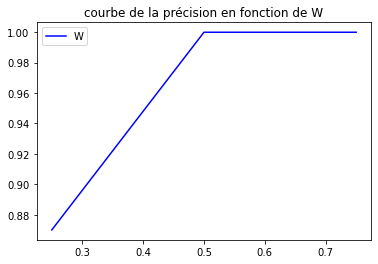

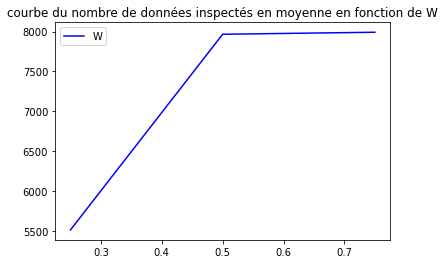

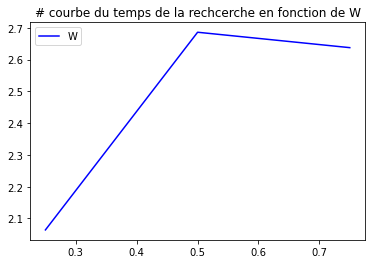

In [5]:
# Influence du facteur W

max = 4
w_values = [0.25 * i for i in range(1, max)]
precisions = []
inspected_avgs = []
times = []
for w in w_values:
    to = time.time()
    print("Valeur de W:%f" % w)
    lsh = LSH(nb_projections=10, nb_tables=2, w=w)
    lsh.fit(base)
    match_count = 0
    inspected_count = 0
    for i, query in enumerate(queries):
        lsh_result = lsh.kneighbors(query, k=1)
        lsh_index = lsh_result[1][0]
        match_count += 1 if lsh_index == ground_indices[i] else 0
        inspected_count += lsh_result[2]

    precision = match_count / len(queries)
    precisions.append(precision)
    print("precision: %f" % precision)

    inspected_avg = inspected_count / len(queries)
    inspected_avgs.append(inspected_avg)
    times.append(time.time() - to)
    print("inspected data: %f" % inspected_avg)
    print("temps des recherches = %f" %(time.time() - to))

# courbe de la précision en fonction de W
plt.plot(w_values, precisions, label="W", color="blue")
plt.legend()
plt.title("courbe de la précision en fonction de W")
plt.show()

# courbe du nombre de données inspectés en moyenne en fonction de W
plt.plot(w_values, inspected_avgs, label="W", color="blue")
plt.title("courbe du nombre de données inspectés en moyenne en fonction de W")
plt.legend()
plt.show()

# courbe du temps de la rechcerche en fonction de W
plt.plot(w_values, times, label="W", color="blue")
plt.title("# courbe du temps de la rechcerche en fonction de W")
plt.legend()
plt.show()

Nombre de tables:1
0.26417219371793266 2111 7991
0.6860217744963083 5482 7991
0.26417219371793266 2111 7991
0.6860217744963083 5482 7991
0.6860217744963083 5482 7991
0.6860217744963083 5482 7991
0.26417219371793266 2111 7991
0.6860217744963083 5482 7991
0.6860217744963083 5482 7991
0.6860217744963083 5482 7991
0.6860217744963083 5482 7991
0.6860217744963083 5482 7991
0.26417219371793266 2111 7991
0.6860217744963083 5482 7991
0.6860217744963083 5482 7991
0.6860217744963083 5482 7991
0.26417219371793266 2111 7991
0.6860217744963083 5482 7991
0.6860217744963083 5482 7991
0.26417219371793266 2111 7991
0.02940808409460643 235 7991
0.6860217744963083 5482 7991
0.26417219371793266 2111 7991
0.6860217744963083 5482 7991
0.26417219371793266 2111 7991
0.26417219371793266 2111 7991
0.26417219371793266 2111 7991
0.26417219371793266 2111 7991
0.26417219371793266 2111 7991
0.6860217744963083 5482 7991
0.6860217744963083 5482 7991
0.6860217744963083 5482 7991
0.6860217744963083 5482 7991
0.6860217744

0.9978726066825179 7974 7991
0.9974971843323739 7971 7991
0.9998748592166187 7990 7991
0.9997497184332373 7989 7991
0.9998748592166187 7990 7991
0.9936178200475535 7940 7991
0.9998748592166187 7990 7991
0.9987485921661869 7981 7991
0.9998748592166187 7990 7991
0.9998748592166187 7990 7991
0.9998748592166187 7990 7991
1.0 7991 7991
0.9998748592166187 7990 7991
0.9936178200475535 7940 7991
0.9998748592166187 7990 7991
0.9969966211988487 7967 7991
0.9978726066825179 7974 7991
0.9998748592166187 7990 7991
1.0 7991 7991
0.9998748592166187 7990 7991
0.9998748592166187 7990 7991
0.9998748592166187 7990 7991
0.9997497184332373 7989 7991
0.9937429608309348 7941 7991
0.9998748592166187 7990 7991
1.0 7991 7991
0.9998748592166187 7990 7991
0.9998748592166187 7990 7991
0.9982480290326617 7977 7991
0.9998748592166187 7990 7991
1.0 7991 7991
0.99712176198223 7968 7991
0.9998748592166187 7990 7991
1.0 7991 7991
0.9998748592166187 7990 7991
0.9982480290326617 7977 7991
0.9996245776498561 7988 7991
0.99

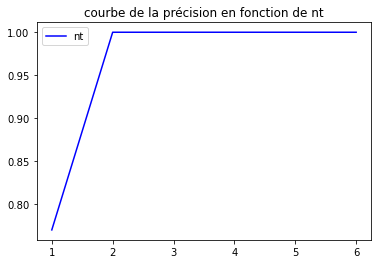

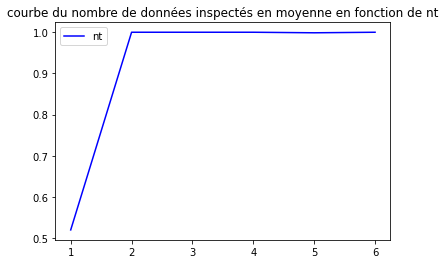

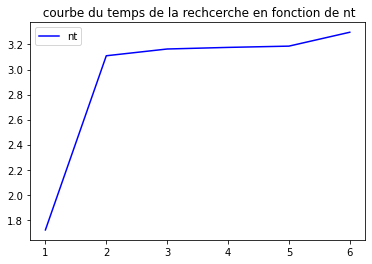

In [19]:
# Influence du nombre de table de hachage
precisions = []
ratio_avgs = []
times = []
data_size = len(base)
for nt in range(1,7):
    to = time.time()
    print("Nombre de tables:%d" % nt)
    lsh = LSH(nb_projections=10, nb_tables=nt, w=1.0)
    lsh.fit(base)
    match_count = 0
    inspected_count = 0
    ratio_sum = 0
    for i, query in enumerate(queries):
        lsh_result = lsh.kneighbors(query, k=1)
        lsh_index = lsh_result[1][0]
        match_count += 1 if lsh_index == ground_indices[i] else 0
        inspected_count = lsh_result[2]
        ratio = inspected_count / data_size
        print(ratio, inspected_count, data_size)
        ratio_sum += ratio

    precision = match_count / len(queries)
    precisions.append(precision)
    print("precision: %f" % precision)

    ratio_avg = ratio_sum / len(queries)
    ratio_avgs.append(ratio_avg)
    print("average ratio : %f" % ratio_avg)
    
    
    times.append(time.time() - to)
    print("temps des recherches = %f" %(time.time() - to))
    
# courbe de la précision en fonction de nt
plt.plot([1,2,3,4,5,6], precisions, label="nt", color="blue")
plt.legend()
plt.title("courbe de la précision en fonction de nt")
plt.show()

# courbe du nombre de données inspectés en moyenne en fonction de nt
plt.plot([1,2,3,4,5,6], ratio_avgs, label="nt", color="blue")
plt.title("courbe du nombre de données inspectés en moyenne en fonction de nt")
plt.legend()
plt.show()

# courbe du temps de la rechcerche en fonction de W
plt.plot([1,2,3,4,5,6], times, label="nt", color="blue")
plt.title(" courbe du temps de la rechcerche en fonction de nt")
plt.legend()
plt.show()

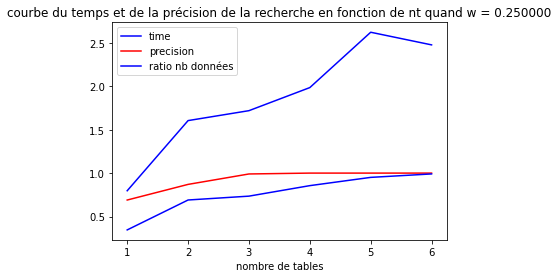

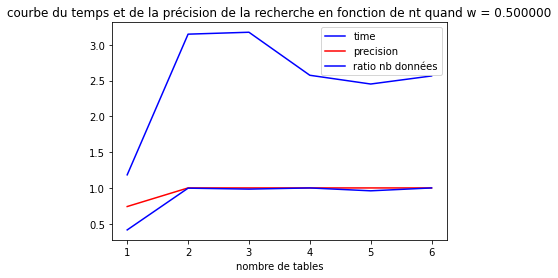

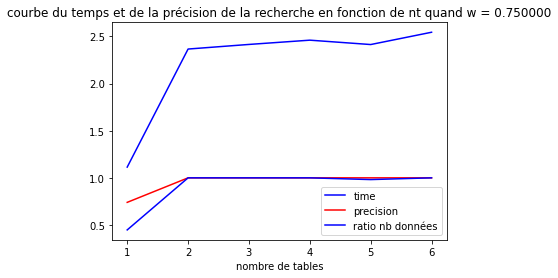

In [20]:
max = 4
w_values = [0.25 * i for i in range(1, max)]
for w in w_values:
    precisions = []
    inspected_avgs = []
    times = []
    ratio_avgs = []
    for nt in range(1,7):
        lsh = LSH(nb_projections=10, nb_tables=nt, w=w)
        lsh.fit(base)
        to = time.time()
        match_count = 0
        inspected_count = 0
        ratio_sum = 0
        for i, query in enumerate(queries):
            lsh_result = lsh.kneighbors(query, k=1)
            lsh_index = lsh_result[1][0]
            match_count += 1 if lsh_index == ground_indices[i] else 0
            inspected_count = lsh_result[2]
            ratio = inspected_count / data_size
            ratio_sum += ratio
            
        #mesure du temps des recherches
        times.append(time.time() - to)
        
        #Calcul du ratio de données éxaminé
        ratio_avg = ratio_sum / len(queries)
        ratio_avgs.append(ratio_avg)
        

        #Calcul de la précision
        precision = match_count / len(queries)
        precisions.append(precision)
        
    # courbe du temps et de la précision de la rechcerche en fonction de W
    plt.plot([1,2,3,4,5,6], times, label="time", color="blue")
    plt.plot([1,2,3,4,5,6], precisions, label="precision", color="red")
    plt.plot([1,2,3,4,5,6], ratio_avgs, label="ratio nb données", color="blue")
    plt.xlabel("nombre de tables")
    plt.legend()
    plt.title("courbe du temps et de la précision de la recherche en fonction de nt quand w = %f" %w)
    plt.show()
        
        